In [1]:
#import pandas library and reads 4 different CSV files
import pandas

baskets = pandas.read_csv("baskets_sample.csv")
category = pandas.read_csv("category_spends_sample.csv")
lineitems_sample = pandas.read_csv("lineitems_sample.csv")
customers = pandas.read_csv("customers_sample.csv")

In [2]:
#Cleaning the data and remove pound symbol and commas from basket spend column
baskets["basket_spend"] = baskets["basket_spend"].replace('[\£,]', '', regex=True).astype(float)
baskets.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1


In [4]:
#selected features,made a new dataframe called "newbaskets" and sorted them into indexes starting from zero
newbaskets = pandas.DataFrame()
newbaskets['frequency'] = (baskets.groupby('customer_number'))['purchase_time'].count()
newbaskets['total_spend'] = (baskets.groupby('customer_number'))['basket_spend'].sum()
newbaskets['average_spend'] = (baskets.groupby('customer_number'))['basket_spend'].mean()
newbaskets['average_quantity'] = (baskets.groupby('customer_number'))['basket_quantity'].mean()
final_assignments = pandas.DataFrame({'customer_number' : newbaskets.index.tolist()})
newbaskets.reset_index(drop = True, inplace = True)
newbaskets.head()

,frequency,total_spend,average_spend,average_quantity
0,56,675.72,12.066429,9.482143
1,33,585.73,17.749394,19.848485
2,59,222.18,3.765763,4.983051
3,37,547.87,14.807297,13.486486
4,48,293.34,6.111250,5.854167


In [5]:
#statistical summary of newbaskets
newbaskets.describe()

,frequency,total_spend,average_spend,average_quantity
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,65.182333,769.412937,14.801139,11.273373
std,47.464717,552.769022,11.161440,8.538046
min,1.000000,7.280000,1.456000,1.200000
25%,32.000000,406.120000,8.036819,6.114316
50%,53.000000,627.170000,11.770923,8.732520
75%,86.000000,957.675000,17.436190,13.388537
max,374.000000,6588.650000,152.621667,90.750000


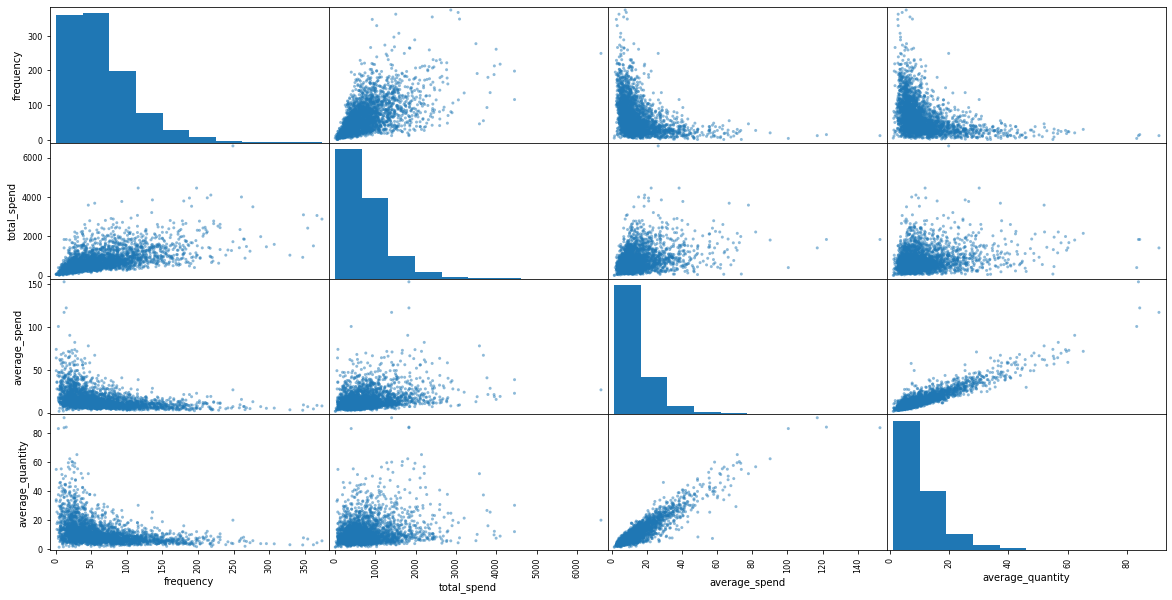

In [6]:
#scatter plot of new baskets  
scatter = pandas.plotting.scatter_matrix(newbaskets, figsize = (20,10))

In [7]:
#correlation of new baskets
corr = newbaskets.corr()
print(corr)

                  frequency  total_spend  average_spend  average_quantity
frequency          1.000000     0.566806      -0.368883         -0.372982
total_spend        0.566806     1.000000       0.315242          0.228917
average_spend     -0.368883     0.315242       1.000000          0.915067
average_quantity  -0.372982     0.228917       0.915067          1.000000


C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

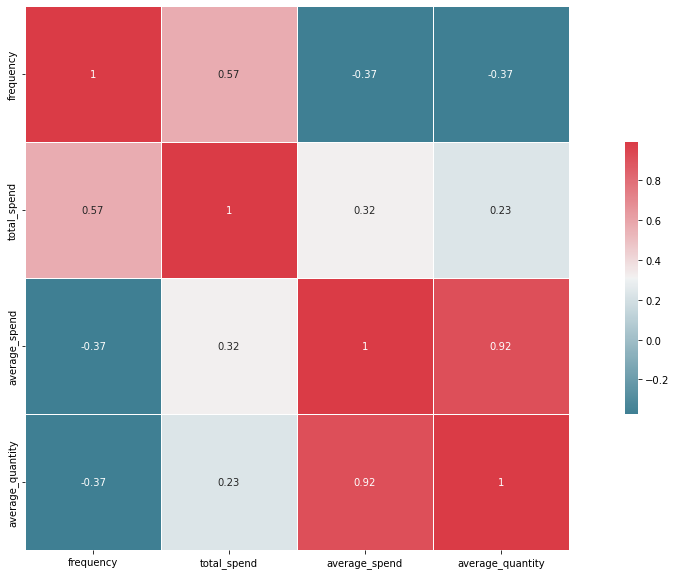

In [8]:
#import seaborn and matplotlib for visualisation and made a correlation heatmap matrix
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

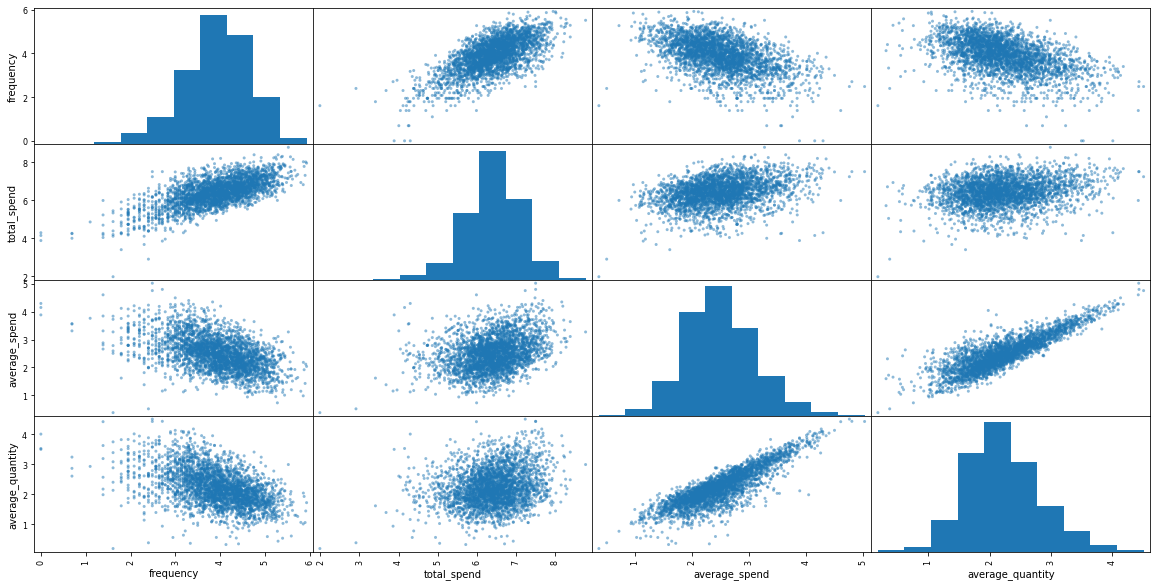

In [9]:
#Normalised the data by using log 
import numpy as np

logged_data = np.log(newbaskets)

scatter = pandas.plotting.scatter_matrix(logged_data, figsize = (20,10))

In [10]:
#imported PCA
import sklearn 

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(logged_data)

PCA(n_components=4)

             frequency  total_spend  average_spend  average_quantity
Dimension 1  -0.746676    -0.355353       0.391324      4.038127e-01
Dimension 2  -0.188381    -0.697104      -0.508723     -4.687853e-01
Dimension 3  -0.271392     0.233318       0.504711     -7.856053e-01
Dimension 4   0.577350    -0.577350       0.577350     -1.500900e-16


<AxesSubplot:>

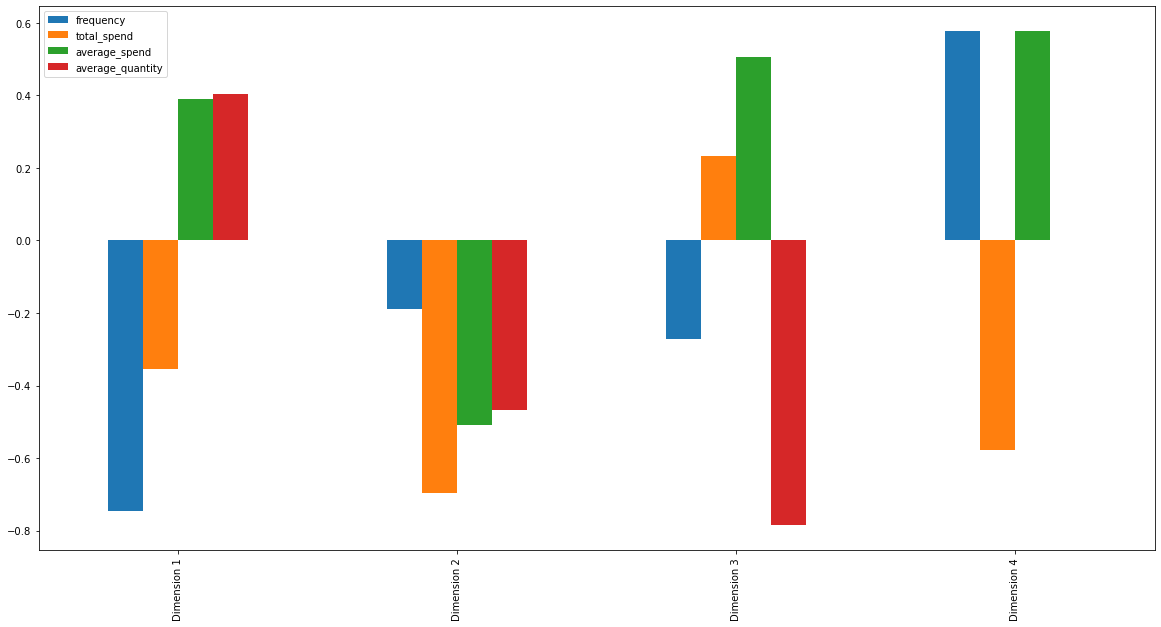

In [11]:
#made a bar plot for four dimensions of selected features
pca_results= pandas.DataFrame(data= pca.fit(logged_data).components_, columns= newbaskets.columns, index= ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])
print(pca_results)

pca_results.plot.bar(figsize=(20, 10))

In [12]:
#printed variance values for the four dimensions
print("PCA explained variance: ", pca.explained_variance_ratio_)
print("Cumulative explained variance: ", pca.explained_variance_ratio_.cumsum())

PCA explained variance:  [5.49864747e-01 4.16541098e-01 3.35941550e-02 2.80540931e-32]
Cumulative explained variance:  [0.54986475 0.96640584 1.         1.        ]


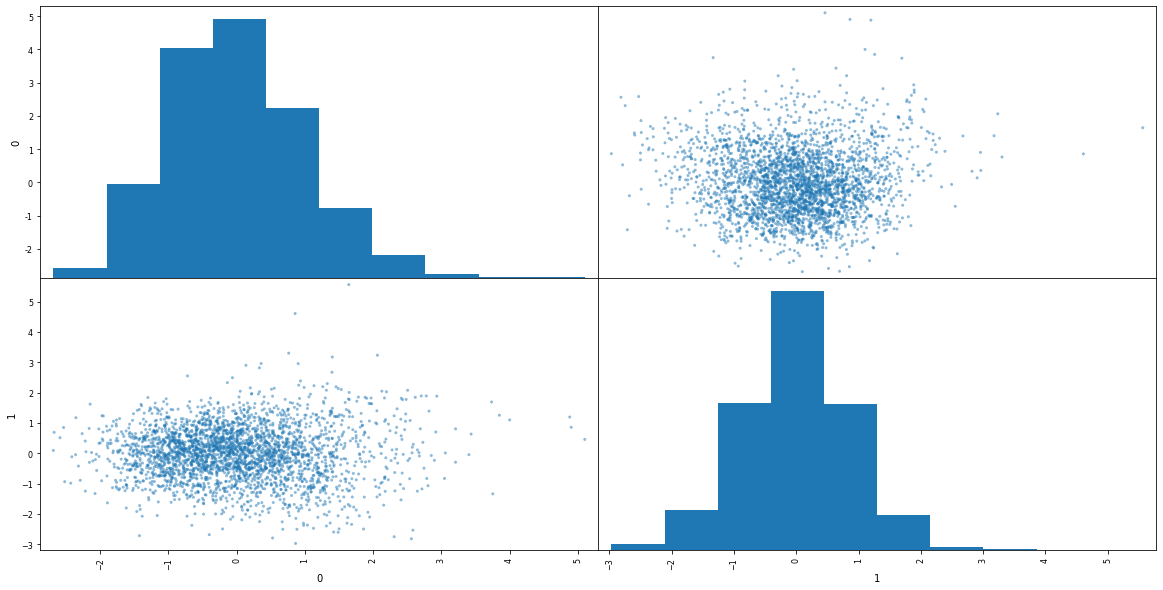

In [13]:
pca = PCA(n_components=2)
pca.fit(logged_data)

reduced_data = pca.transform(logged_data)

reduced_data = pandas.DataFrame(reduced_data)
scatter = pandas.plotting.scatter_matrix(reduced_data, figsize = (20,10))

In [14]:
#used K means clustering and took out silhouette score 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
print(range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters).fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))    

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.35060732003364076)
For n_clusters = 3. The average silhouette_score is : 0.3500444453204797)
For n_clusters = 4. The average silhouette_score is : 0.32476758505095876)
For n_clusters = 5. The average silhouette_score is : 0.319795936016472)
For n_clusters = 6. The average silhouette_score is : 0.3288956429593481)
For n_clusters = 7. The average silhouette_score is : 0.3157866146735518)
For n_clusters = 8. The average silhouette_score is : 0.32446154838401225)
For n_clusters = 9. The average silhouette_score is : 0.32696695416829086)
For n_clusters = 10. The average silhouette_score is : 0.3156100333261988)


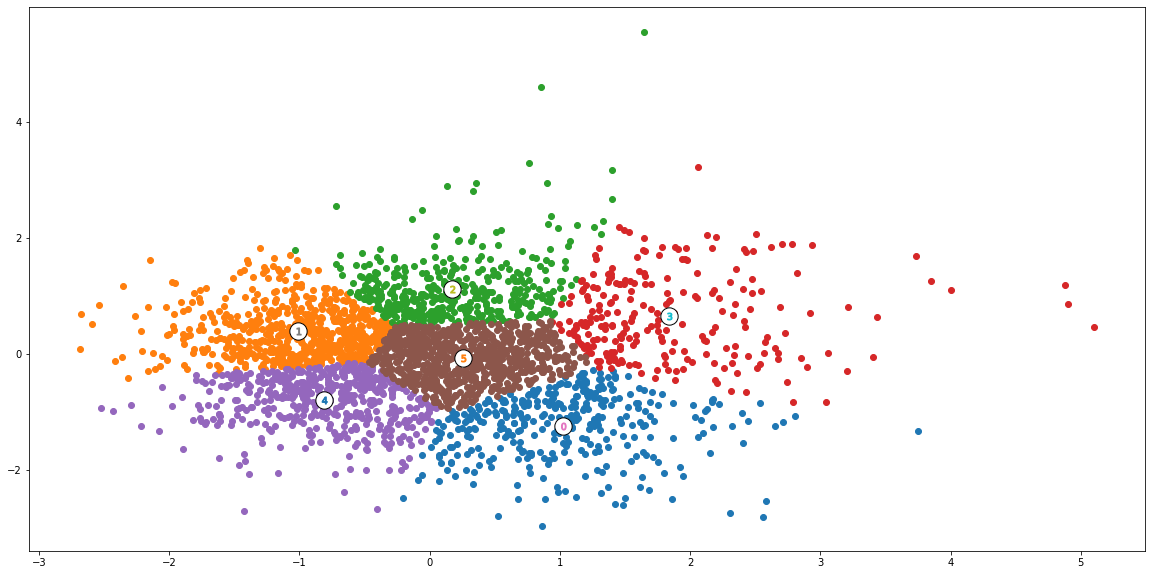

In [15]:
#made a scatterplot depicting different clusters
clusterer = KMeans(n_clusters=6).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

assignments = pandas.DataFrame(preds, columns = ['Cluster'])

plot_data = pandas.concat([assignments, reduced_data], axis = 1)

plt.rcParams['figure.figsize'] = (20,10)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

In [16]:
#took out 6 segments 
log_centres = pca.inverse_transform(centres)

true_centres = np.exp(log_centres)

segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pandas.DataFrame(np.round(true_centres), columns = newbaskets.columns)
true_centres.index = segments
print(true_centres)

           frequency  total_spend  average_spend  average_quantity
Segment 0       30.0       1008.0           34.0              25.0
Segment 1      100.0        668.0            7.0               5.0
Segment 2       36.0        264.0            7.0               6.0
Segment 3       11.0        202.0           18.0              14.0
Segment 4      107.0       1425.0           13.0              10.0
Segment 5       42.0        583.0           14.0              11.0


In [17]:
#listed a statistical summary of each segment
final_assigments = pandas.concat([assignments, newbaskets], axis = 1)

for c, d in final_assigments.groupby('Cluster'):  
    print("Segment", c+1)
    display(d.describe())

Segment 1


,Cluster,frequency,total_spend,average_spend,average_quantity
count,358.0,358.000000,358.000000,358.000000,358.000000
mean,0.0,33.134078,1110.661201,35.840130,27.596698
std,0.0,14.922354,553.252240,15.886932,11.942192
min,0.0,4.000000,401.930000,18.376522,7.238095
25%,0.0,22.000000,706.880000,25.519692,19.908493
50%,0.0,29.000000,956.580000,31.208600,24.164773
75%,0.0,41.000000,1365.455000,40.518390,31.042986
max,0.0,93.000000,3764.810000,152.621667,90.750000


Segment 2


,Cluster,frequency,total_spend,average_spend,average_quantity
count,668.0,668.000000,668.000000,668.000000,668.000000
mean,1.0,107.245509,700.129775,6.924650,5.515231
std,0.0,43.678183,235.101738,2.053097,1.689252
min,1.0,45.000000,255.630000,2.070718,1.402439
25%,1.0,79.000000,524.585000,5.451834,4.244190
50%,1.0,95.000000,673.205000,6.881321,5.487492
75%,1.0,121.250000,834.577500,8.333370,6.705481
max,1.0,362.000000,1975.920000,13.896889,10.855263


Segment 3


,Cluster,frequency,total_spend,average_spend,average_quantity
count,425.0,425.000000,425.000000,425.000000,425.000000
mean,2.0,38.477647,284.922659,7.758935,6.128477
std,0.0,13.565706,91.268232,2.377907,1.810061
min,2.0,5.000000,7.280000,1.456000,1.200000
25%,2.0,27.000000,225.420000,6.124902,4.850000
50%,2.0,38.000000,291.870000,7.547308,6.132075
75%,2.0,50.000000,352.190000,9.046000,7.302326
max,2.0,77.000000,503.120000,15.261000,11.240000


Segment 4


,Cluster,frequency,total_spend,average_spend,average_quantity
count,245.0,245.000000,245.000000,245.000000,245.000000
mean,3.0,12.506122,231.158898,20.262707,15.548678
std,0.0,5.047821,106.102774,10.443245,7.847154
min,3.0,1.000000,30.230000,5.038333,4.900000
25%,3.0,8.000000,148.250000,13.384000,10.200000
50%,3.0,13.000000,225.690000,17.511667,13.733333
75%,3.0,17.000000,314.910000,24.419412,18.571429
max,3.0,23.000000,457.940000,73.750000,55.000000


Segment 5


,Cluster,frequency,total_spend,average_spend,average_quantity
count,510.0,510.000000,510.000000,510.000000,510.000000
mean,4.0,113.396078,1536.789118,14.325129,9.962578
std,0.0,46.855293,631.583612,4.916024,3.813418
min,4.0,57.000000,798.100000,6.634047,3.719780
25%,4.0,81.000000,1099.422500,10.674929,7.302067
50%,4.0,100.000000,1392.415000,12.993388,9.129356
75%,4.0,133.750000,1756.327500,16.954680,11.748476
max,4.0,374.000000,6588.650000,38.346466,30.163793


Segment 6


,Cluster,frequency,total_spend,average_spend,average_quantity
count,794.0,794.000000,794.000000,794.000000,794.000000
mean,5.0,43.823678,606.356297,14.331559,11.034489
std,0.0,12.428627,173.342291,3.690440,3.136493
min,5.0,20.000000,301.440000,7.100462,4.421053
25%,5.0,34.000000,472.507500,11.476245,8.685577
50%,5.0,43.000000,571.560000,13.957528,10.704545
75%,5.0,53.750000,721.750000,16.624600,13.166347
max,5.0,80.000000,1220.310000,34.389231,19.848485


In [18]:
#assigned a cluster to each customer number
final_assignments['Cluster'] = preds
final_assignments

,customer_number,Cluster
0,14,5
1,45,5
2,52,2
3,61,5
4,63,2
...,...,...
2995,16295,5
2996,16301,2
2997,16303,2
2998,16306,5


In [19]:
#final answer file 
final_assignments.to_csv("Answer_final")